# Task-3: Geospatial Analysis

In [3]:
pip install pandas folium matplotlib seaborn

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.



  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


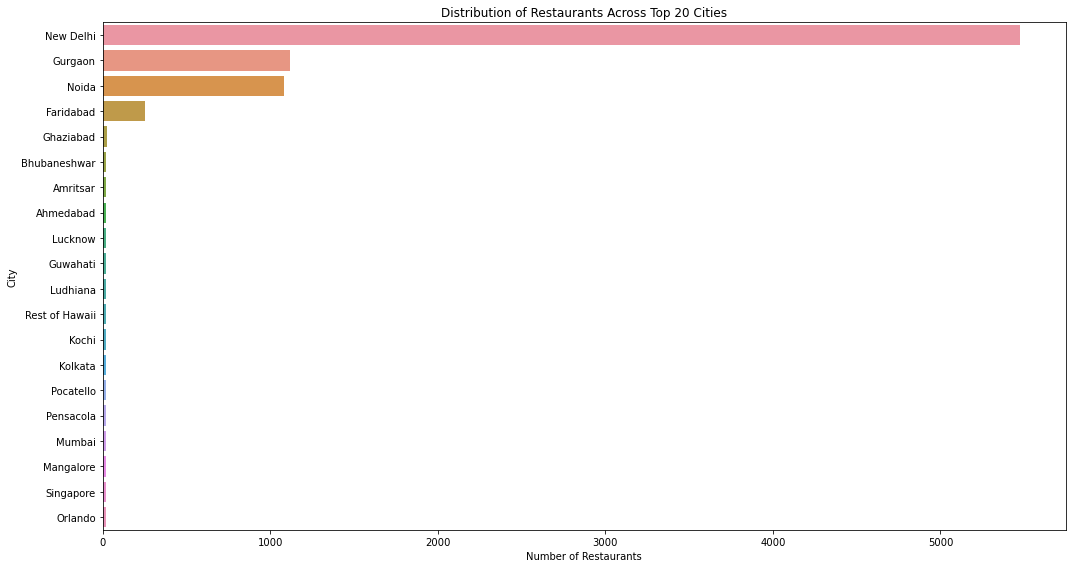

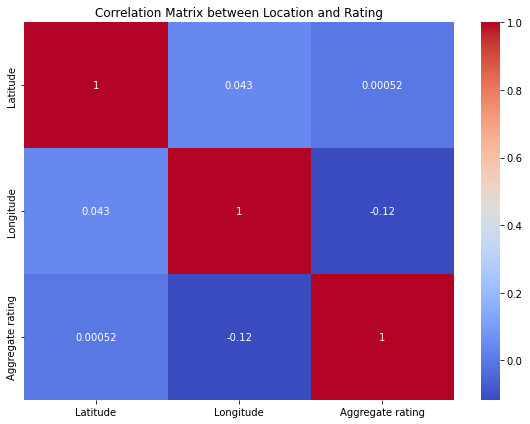

In [13]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected file path (ensure no trailing spaces in the filename)
file_path = r'C:\Users\91702\Dataset.csv'
data = pd.read_csv(file_path)

# Task 1: Visualize the locations of restaurants on a map using latitude and longitude information
def create_map(data):
    # Create a map centered around an average location
    m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=2)

    # Add marker cluster
    marker_cluster = MarkerCluster().add_to(m)

    for _, row in data.iterrows():
        folium.Marker(location=[row['Latitude'], row['Longitude']], 
                      popup=row['Restaurant Name']).add_to(marker_cluster)
    
    return m

restaurant_map = create_map(data)
restaurant_map.save('restaurant_map.html')

# Task 2: Analyze the distribution of restaurants across different cities or countries
plt.figure(figsize=(15, 8))
city_counts = data['City'].value_counts().head(20)  # Top 20 cities
sns.barplot(x=city_counts, y=city_counts.index)
plt.title('Distribution of Restaurants Across Top 20 Cities')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('restaurant_distribution.png')

# Task 3: Determine if there is any correlation between the restaurant's location and its rating
correlation_data = data[['Latitude', 'Longitude', 'Aggregate rating']].dropna()
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Location and Rating')
plt.tight_layout()
plt.savefig('location_rating_correlation.png')

print(correlation_matrix)
